# Dataset: Wine Quality
This dataset is comprised of many measurements of different Portuguese wines (downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality), published [here](http://www.sciencedirect.com/science/article/pii/S0167923609001377)). Specifically, 11 attributes were measured for several hundred red and white wines (e.g. acidity, sugar, sulfar, pH), and each of their qualities were rated from 0 to 10. 

In these exercises, we will use a variety of unsupervised and supervised learning techniques to classify and predict different wine attributes.

# Section 1: Load and Preprocessing the Data
### Load and concatenate the two wine datasets. 
**Hint:** Remember to add a new column denoating the red and white wines. Also, the datasets are semi-colon-separated.

In [1]:
import os
from pandas import read_table, concat

## Load red wine dataset.
red = read_table(os.path.join('wine','winequality-red.csv'), sep=';')
red['color'] = 'red'

## Load white wine dataset.
white = read_table(os.path.join('wine','winequality-white.csv'), sep=';')
white['color'] = 'white'

## Concatenate.
wines = concat([red,white])
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Visualize thie distribution of each of the 12 attributes with histograms. 
This can be accomplished in several ways. Two such ways are:
1. Initialize multiple plots through Matplotlib and use displot, as shown [here](http://seaborn.pydata.org/examples/distplot_options.html). Multiple for loops will be necessary.
2. Melt the dataframe preserving only the color attribute. Then use FacetGrid as shown [here](http://seaborn.pydata.org/examples/faceted_histogram.html). You will want to turn off sharex/sharey.

#### Matplotlib + Distplot

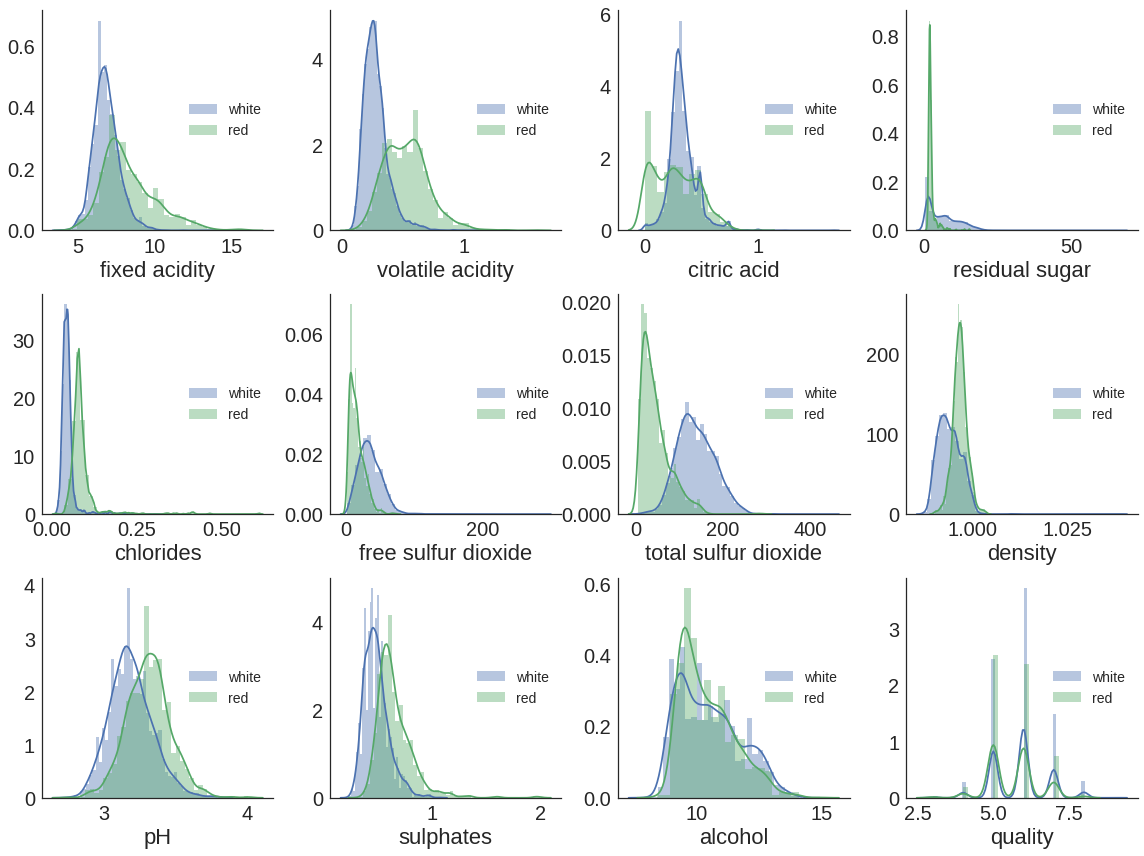

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

## Initialize plots.
fig, axes = plt.subplots(3,4,figsize=(16,12))

for i, column in enumerate(wines.columns[:-1]):
    
    for color in ['white','red']:
        
        ax = sns.distplot(wines.loc[wines.color==color, column], label=color, ax = axes[i//4,i%4])
    
    ax.legend(loc=7, fontsize=14)
    
sns.despine()
plt.tight_layout()

#### Seaborn only: Facetgrid + Displot

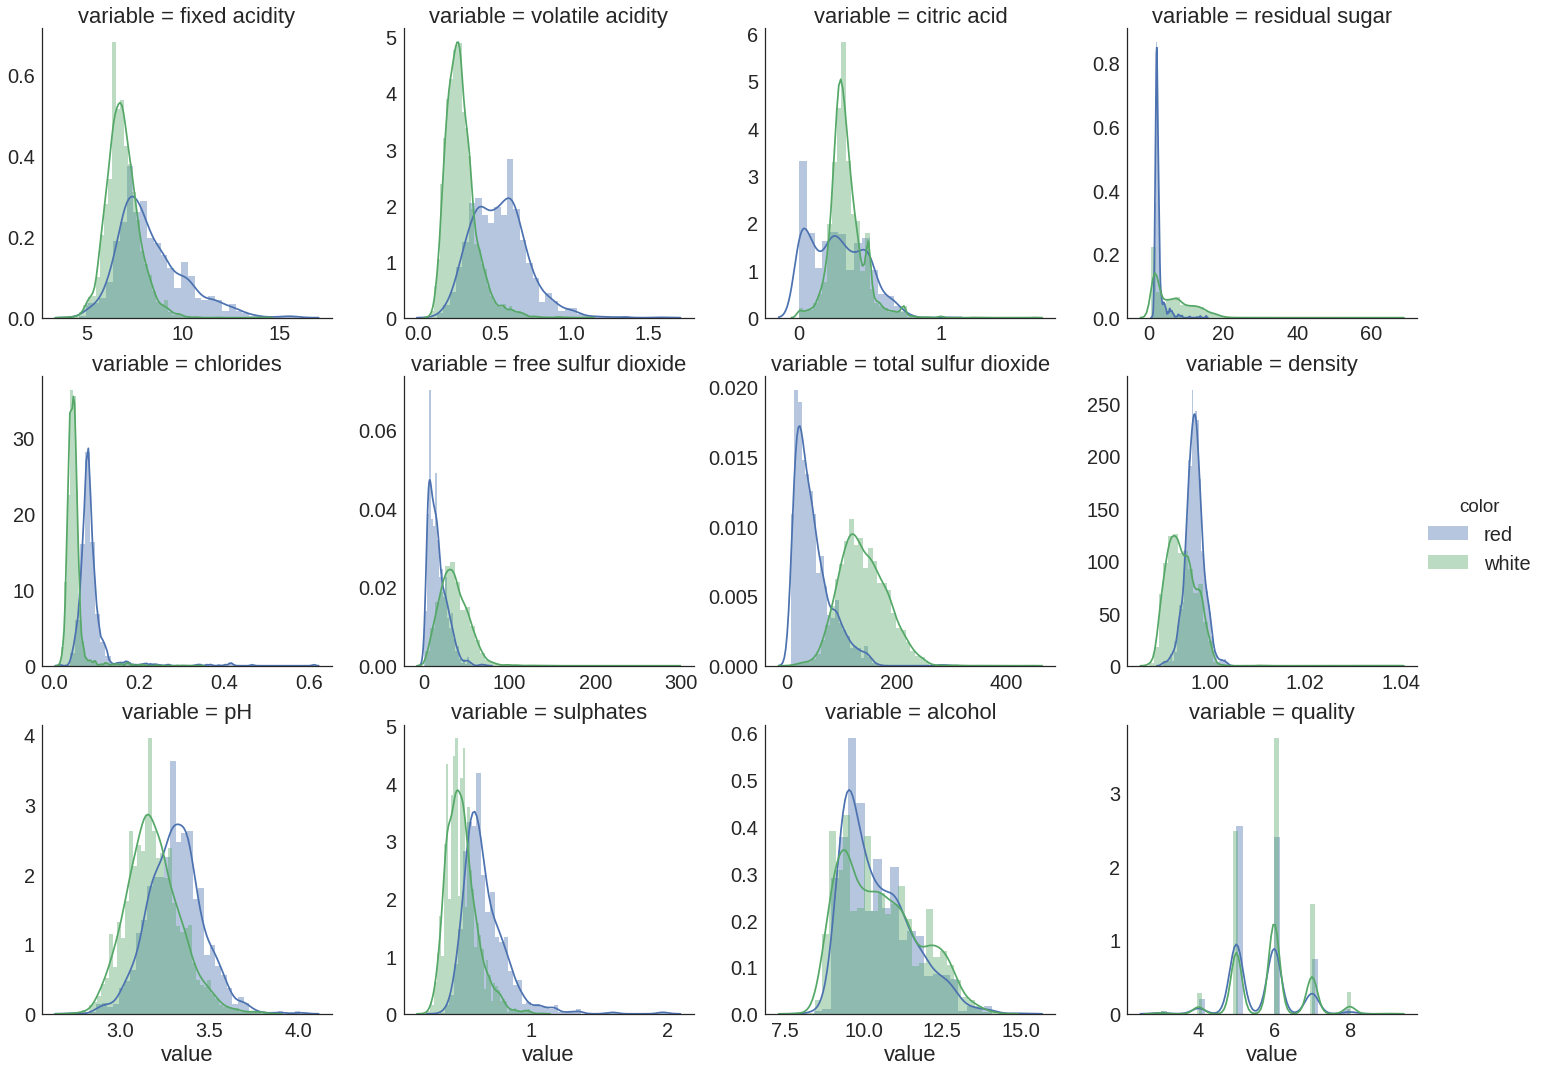

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

## Melt dataset.
melted = wines.melt(id_vars='color')

## Initialize FacetGrid.
G = sns.FacetGrid(melted, col='variable', hue='color', col_wrap=4, 
                  sharex=False, sharey=False, size=5);
G.map(sns.distplot, 'value');
G.add_legend()

Regardless of the plotting method, two trends should be apparent: 
1. Certain attributes strongly differentiate red vs. white lines, including the acidity, sulfur, and pH variables.
2. Several of the variables are variables are clearly non-normally distributed, especially citric acid and alcohol. 

The next step will be to normalize the variables to some constant scale for ease of fitting various machine learning models.

### Normalize the wine attributes (not including Quality) with the RobustScaler from Scitkit-Learn.
Look back at the *Data Transformations with Scikit-Learn* section of Module 3 notes for a reminder if necessary.

In [4]:
from sklearn.preprocessing import RobustScaler

## Initialize the object. 
robust = RobustScaler()

## Apply to wine attributes.
attribute_cols = wines.select_dtypes(include=['float64']).columns
wines[attribute_cols] = robust.fit_transform(wines[attribute_cols])
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,0.307692,2.411765,-2.214286,-0.174603,1.074074,-0.750000,-1.063291,0.625806,1.428571,0.294118,-0.500000,5,red
1,0.615385,3.470588,-2.214286,-0.063492,1.888889,-0.166667,-0.645570,0.410753,-0.047619,1.000000,-0.277778,5,red
2,0.615385,2.764706,-1.928571,-0.111111,1.666667,-0.583333,-0.810127,0.453763,0.238095,0.823529,-0.277778,5,red
3,3.230769,-0.058824,1.785714,-0.174603,1.037037,-0.500000,-0.734177,0.668817,-0.238095,0.411765,-0.277778,6,red
4,0.307692,2.411765,-2.214286,-0.174603,1.074074,-0.750000,-1.063291,0.625806,1.428571,0.294118,-0.500000,5,red


### Using the lmplot function from Seaborn, plot the 11 attributes against Quality, split by color.
The final plot should have the attributes on the x-axis and quality on the y-axis. 

**Hint:** The DataFrame will need to be melted first, preserving quality and color. See [here](https://seaborn.pydata.org/examples/anscombes_quartet.html), [here](https://seaborn.pydata.org/examples/multiple_regression.html), and the Diabetes Dataset section of the Module 3 notes for inspiration. Try messing with col_wrap, sharex, and sharey, y_jitter for better results.

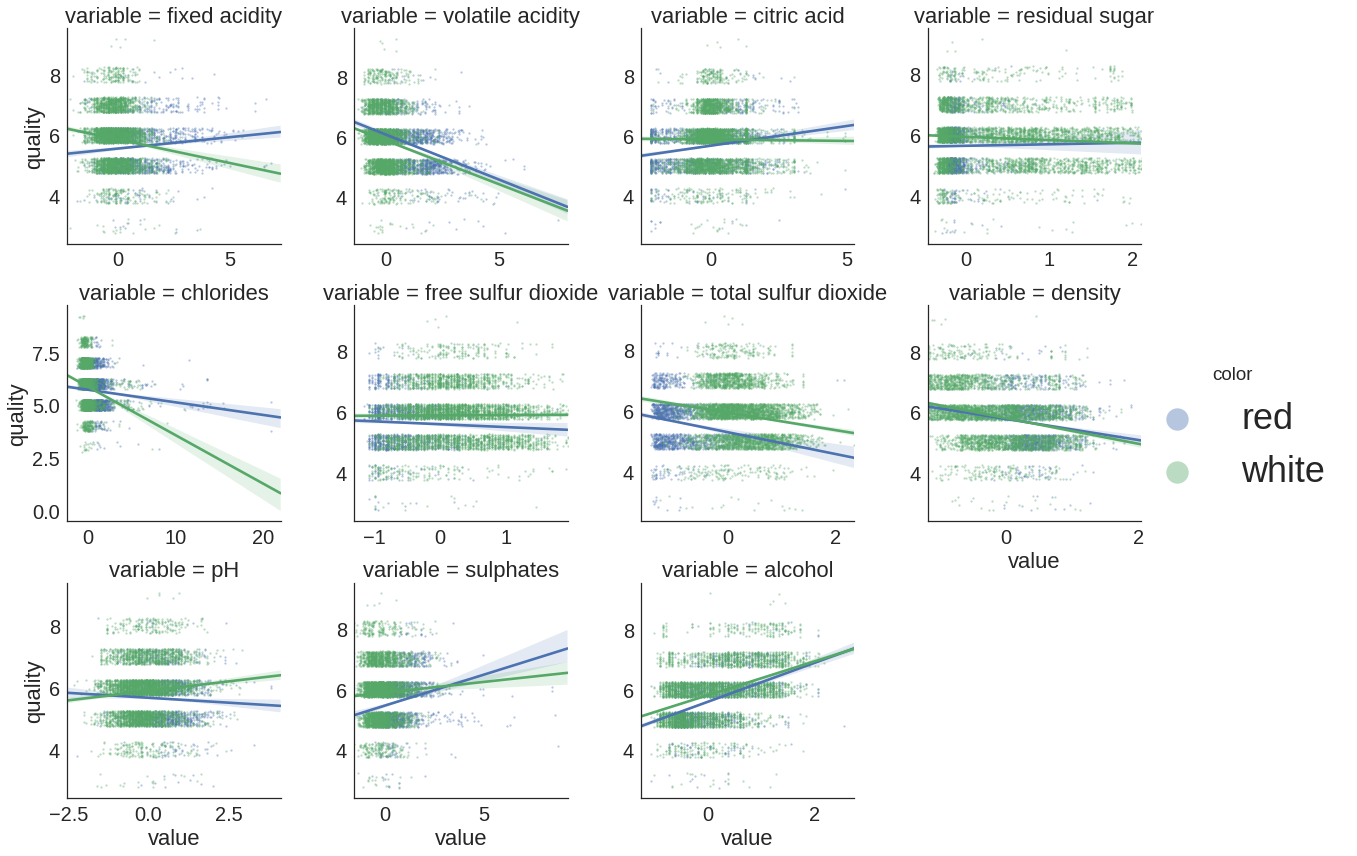

In [5]:
## Melt the DataFrame.
melted = wines.melt(id_vars=['quality','color'])

## Plot.
G = sns.lmplot('value', 'quality', melted, hue='color', col='variable', 
               col_wrap=4, sharex=False, sharey=False, y_jitter=0.25,
               legend=False, size=4,
               
               ## Note: I pass additional variables to scale the 
               ## size of the markers and make them transparent
               ## to make the graph easier to interpret.
               scatter_kws=dict(s=5,alpha=0.4));

G.add_legend(fontsize=36, markerscale=10);

As it should now be clear, several of the variables seem to show a relationship to the Quality score. For example, higher volatile acidities seem to predict lower quality scores. In contrast, increased alcohol content seems to predict higher quality scores.

### Using Statsmodels, compute and visualize the variance inflation factor of the 11 attributes. 


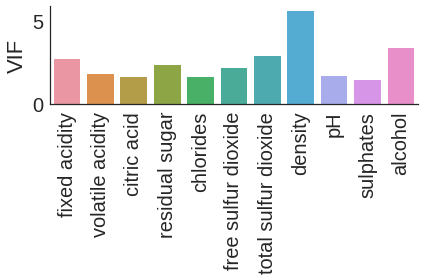

In [6]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Extract attributes.
attributes = wines.select_dtypes(include=['float64'])
xticks = np.arange(attributes.shape[-1])

## Iteratively compute VIF.
vif = [variance_inflation_factor(attributes.as_matrix(), n) for n in xticks]

## Plot.
ax = sns.barplot(xticks, vif)
ax.set_xticklabels(attributes.columns, rotation=90)
ax.set_ylabel('VIF')

plt.tight_layout()
sns.despine()

Though density seems to be a little high (VIF ~= 5.55), we will leave it be. Otherwise our variables seem to be largely non-collinear meaning that we should have no trouble fitting linear models.

# Section 2: Unsupervised Learning
In this section, we will attempt to cluster the two wine types (red & color) without any training. 

### Perform principal components analysis on the 11 wine attributes, extracting the first two principle components. Print the explained variance of the first two components.

In [7]:
from sklearn.decomposition import PCA

## Extract attributes.
attributes = wines.select_dtypes(include=['float64'])

## Initialize the PCA with two components.
pca = PCA(n_components=2)

## Fit the data with PCA.
pca_fit = pca.fit(attributes)

## Transform the data.
transformed = pca_fit.fit_transform(attributes)

print(pca_fit.explained_variance_ratio_)

[ 0.31058414  0.20311873]


### Using the scatter function from Matplotlib or the kdeplot from Seaborn, make a scatterplot of the first two principal components split by wine color.
See [here](https://seaborn.pydata.org/examples/multiple_joint_kde.html) for a tutorial using kdeplot.

In either case, you will need to index into your PCA-reduced data twice: once per wine color. For nicer plotting colors, try using the Seaborn [color palette tools](http://seaborn.pydata.org/tutorial/color_palettes.html). Try to set a legend as well!

#### Using Matplotlib and scatter

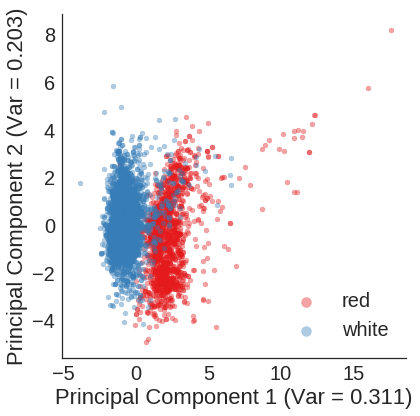

In [8]:
## Open figure.
fig, ax = plt.subplots(1,1,figsize=(6,6))

## Main loop.
colors = sns.color_palette('Set1', 2)

for i, winecolor in enumerate(['red','white']):
    
    ax.scatter(transformed[wines.color==winecolor, 0], transformed[wines.color==winecolor, 1],
               s = 25, color=colors[i], alpha=0.4, label=winecolor)
    
## Fix axes.
ax.set_xlabel('Principal Component 1 (Var = %0.3f)' %pca_fit.explained_variance_ratio_[0])
ax.set_ylabel('Principal Component 2 (Var = %0.3f)' %pca_fit.explained_variance_ratio_[1])
ax.legend(loc='best', markerscale = 2)

sns.despine()
plt.tight_layout()

#### Using Seaborn and kdeplot

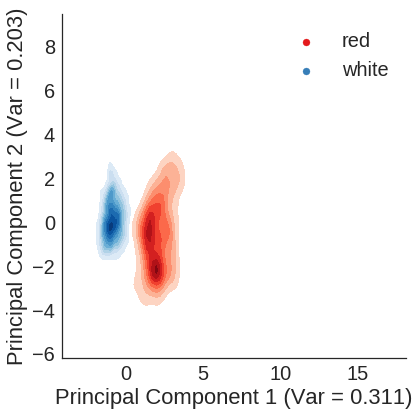

In [9]:
## Open figure.
fig, ax = plt.subplots(1,1,figsize=(6,6))

## Main loop.
cmaps = ['Reds','Blues']
colors = sns.color_palette('Set1', 2)

for i, winecolor in enumerate(['red','white']):
    
    ax = sns.kdeplot(transformed[wines.color==winecolor], cmap=cmaps[i], 
                     shade=True, shade_lowest=False, ax=ax)
    ax.scatter([],[],label=winecolor,color=colors[i])
    
## Fix axes.
ax.set_xlabel('Principal Component 1 (Var = %0.3f)' %pca_fit.explained_variance_ratio_[0])
ax.set_ylabel('Principal Component 2 (Var = %0.3f)' %pca_fit.explained_variance_ratio_[1])
ax.legend(loc='best')

sns.despine()
plt.tight_layout()

It is pretty clear from PCA that even two components are capable of separating out the two wine types. 

### Perform k-means clustering on the 11 wine attributes. Compute the accuracy score of the k-means fit.
To do this, we will need to binarize the wine color variable.

In [10]:
from sklearn.cluster import KMeans

## Initialize K-means for iris.
kmeans = KMeans(n_clusters=2, random_state=0)

## Apply to iris.
kmeans_wines = kmeans.fit(attributes)

## Binarize wine colors.
color_dichotomized = np.where(wines.color == 'red', 0, 1)

## Compute score.
color_predicted = kmeans_wines.predict(attributes)
print(np.equal(color_dichotomized, color_predicted).mean())

0.971833153763


Similar to PCA, K-means clustering accurately predicts wine type.

### Make a denodrogram using the Ward agglomerative clustering method.
**NOTE:** Caution, this exercise may be a little slow. Feel free to skip if running short on time.

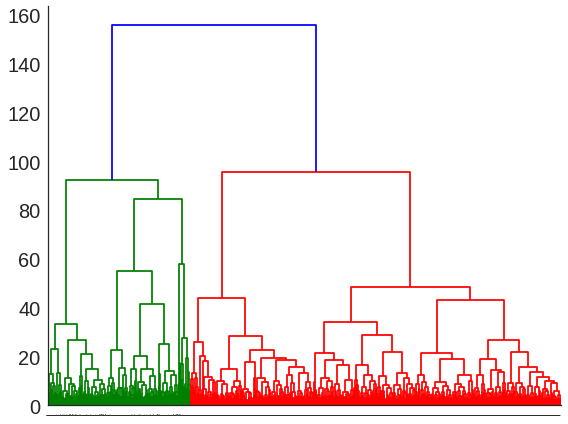

In [11]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(attributes)

fig, ax = plt.subplots(1,1,figsize=(8,6))
dendrogram(linkage_array, leaf_font_size=0, ax=ax);
sns.despine()
plt.tight_layout()

# Section 3: Supervised Learning
In this section, we will employed supervised learning approaches to both predict wine color and to predict quality score. 

### While using the Scikit-Learn logistic regression method to predict wine color, demonstrate and visualize the effect of different training size sets on test performance.
Specifically, test training sets in the range of [0.25,0.75,0.10] and test size = 0.25. Use either penalty function (l1 or l2).

For visualization, try out Seaborn [boxplots](https://seaborn.pydata.org/examples/horizontal_boxplot.html), [swarmplots](https://seaborn.pydata.org/examples/scatterplot_categorical.html), or [violinplots](https://seaborn.pydata.org/examples/simple_violinplots.html). In any case, it will be easiest for you to store the scores in a new DataFrame. Take inspiration from the Module 3 Notes to do this.

#### Perform Logistic Regression with cross validation

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

## Define data.
X = wines.select_dtypes(include=['float64'])
y = wines.color

## Define parameters.
train_sizes = np.arange(0.25,0.76,0.10)
test_size = 0.25
n_splits = 50

## Initialize logistic regression.
lr = LogisticRegression(penalty='l1')

## Main loop.
scores = []
for train_size in train_sizes:
    
    ## Initialize cross validation method.
    sss = StratifiedShuffleSplit(n_splits=n_splits, train_size=train_size, 
                                 test_size=test_size, random_state=0)
    
    ## Compute scores.
    scores.append( cross_val_score(lr, X, y, cv=sss) )

#### Assemble scores into DataFrame

In [13]:
from pandas import DataFrame

df = np.array([np.repeat([train_sizes], n_splits), np.concatenate(scores)]).T
df = DataFrame(df, columns=('Train Size', 'Score'))
df.head(5)

,Train Size,Score
0,0.25,0.994462
1,0.25,0.996308
2,0.25,0.992615
3,0.25,0.994462
4,0.25,0.995077


#### Seaborn Boxplots


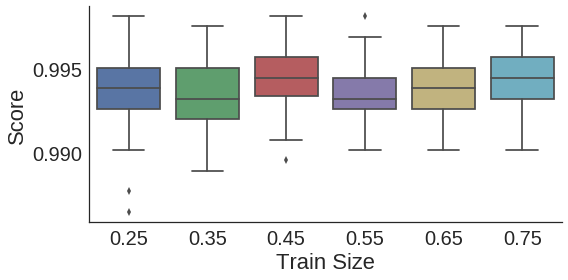

In [14]:
fig = plt.figure(figsize=(8,4))
sns.boxplot('Train Size', 'Score', data=df)
sns.despine()
plt.tight_layout()

#### Seaborn Swarmplot


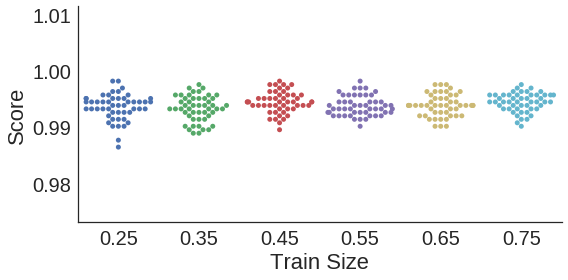

In [15]:
fig = plt.figure(figsize=(8,4))
sns.swarmplot('Train Size', 'Score', data=df)
sns.despine()
plt.tight_layout()

#### Seaborn Violinplot


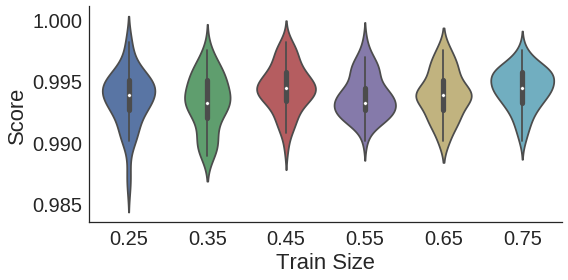

In [16]:
fig = plt.figure(figsize=(8,4))
sns.violinplot('Train Size', 'Score', data=df)
sns.despine()
plt.tight_layout()

### Fit a logistic regression model to 75/25 split, compute scores, and plot the coefficients sorted by magnitude.
Be sure to include the (sorted) column names as xticklabels.

LogisticRegression Train Score: 0.995
LogisticRegression Train Score: 0.994


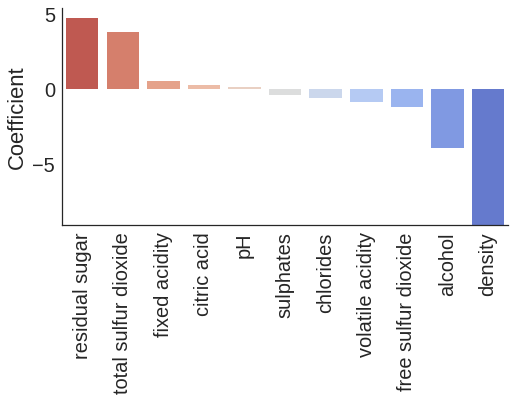

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Fit data to model.
lrf = LogisticRegression(penalty='l1').fit(X_train,y_train)

## Print scores.
print('LogisticRegression Train Score: %0.3f' %lrf.score(X_train,y_train))
print('LogisticRegression Train Score: %0.3f' %lrf.score(X_test,y_test))

## Extract coefficients.
coef = lrf.coef_.squeeze()

## Get sorting index.
ix = np.argsort(coef)[::-1]

## Plot.
fig = plt.figure(figsize=(8,4))
ax = sns.barplot(np.arange(len(ix)), coef[ix], palette='coolwarm_r')
ax.set_xticklabels(X.columns[ix], rotation=90);
ax.set_ylabel('Coefficient');

sns.despine()

### Turning now to predicting the quality score of wines, compare the performance of OLS linear regression against ridge regression for a  sampling of training set sizes.
Specifically, test training sets in the range of [0.25,0.75,0.10] and test size = 0.25. Visualize using lmplot, splitting between the two regression model types.

**Hint:** Try preallocating a scores matrix to make the post-processing of the scores into DataFrame easier. You will need to make an empty 3-dimensional matrix of size [n_train_sizes, n_splits, 3]. The 3rd dimension will track: (test_size, OLS, Lasso).

See [here](https://seaborn.pydata.org/examples/multiple_regression.html) for visualization help.

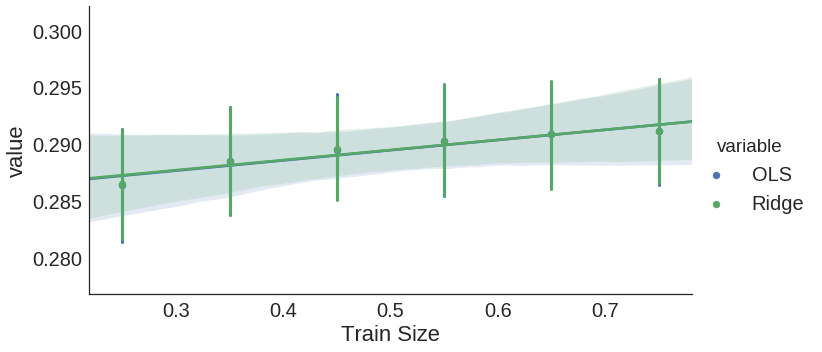

In [18]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import ShuffleSplit

## Define data.
X = wines.select_dtypes(include=['float64'])
y = wines.quality

## Define parameters.
train_sizes = np.arange(0.25,0.76,0.10)
test_size = 0.25
n_splits = 50

## Initialize regression classes.
lr = LinearRegression()
ridge = Ridge(alpha=1)

## Preallocate scores matrix.
scores = np.empty( [len(train_sizes), n_splits, 3] )
for i, train_size in enumerate(train_sizes):
    
    ## Initialize cross validation method.
    ss = ShuffleSplit(n_splits=n_splits, train_size=train_size, 
                      test_size=test_size, random_state=0)
    
    ## Compute scores.
    scores[i,:,0] = train_size
    scores[i,:,1] = cross_val_score(lr, X, y, cv=ss)
    scores[i,:,2] = cross_val_score(ridge, X, y, cv=ss)
    
## Reshape.
scores = scores.reshape((len(train_sizes)*n_splits), 3)
df = DataFrame(scores, columns=('Train Size', 'OLS', 'Ridge'))
df = df.melt('Train Size')

## Plot.
sns.lmplot('Train Size', 'value', df, hue='variable', x_bins=df['Train Size'], aspect=2);

Both models show similar performance with increase generalization with increasing training set size and an upwards ceiling of R2 = 0.300. Let's see if we can improve model fit with other models.
### Fit a random forest regressor model to the 11 attributes to predict quality.
Using the same multiple 80/20 splits, evaluate the effect of forest size on predictive ability. Visualize with the swarmplot.

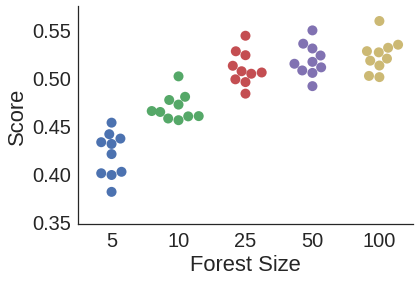

In [19]:
from sklearn.ensemble import RandomForestRegressor

## Define data.
X = wines.select_dtypes(include=['float64'])
y = wines.quality

## Define cross validation method.
n_splits = 10
ss = ShuffleSplit(n_splits=n_splits, train_size=0.8, test_size=0.2, random_state=0)

## Define forest sizes.
forest_sizes = [5, 10, 25, 50, 100]

## Main loop.
scores = np.empty((n_splits,len(forest_sizes)))
for i, forest_size in enumerate(forest_sizes):
    
    ## Initialize RandomForestRegressor.
    rfr = RandomForestRegressor(n_estimators=forest_size)
    
    ## Compute scores.
    scores[:,i] = cross_val_score(rfr, X, y, cv=ss)

## Convert to DataFrame and melt.
df = DataFrame(scores, columns=forest_sizes)
df = df.melt(var_name='Forest Size', value_name='Score')
sns.swarmplot('Forest Size', 'Score', data=df, size=10)
sns.despine()

### Given the performance of the random forest method, fit an 80/20 split, compute socre, and show most important coefficients.

RFR Train Score: 0.934
RFR Train Score: 0.520


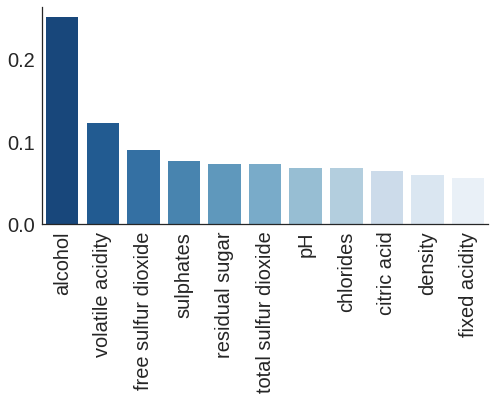

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

## Initialize RandomForestRegressor.
rfr = RandomForestRegressor(n_estimators=100)

## Fit.
rfr_fit = rfr.fit(X_train,y_train)

## Print scores.
print('RFR Train Score: %0.3f' %rfr_fit.score(X_train,y_train))
print('RFR Train Score: %0.3f' %rfr_fit.score(X_test,y_test))

## Extract and plot sorted coefficients.
coef = rfr_fit.feature_importances_
ix = np.argsort(coef)[::-1]

fig = plt.figure(figsize=(8,4))
ax = sns.barplot(np.arange(len(ix)), coef[ix], palette='Blues_r')
ax.set_xticklabels(X.columns[ix], rotation=90)
sns.despine()